In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from football_sim.football_sim import *
import os
plt.rcParams['figure.figsize']=[16,9]

In [2]:
urls1718 = {'EN': 'http://www.football-data.co.uk/mmz4281/1718/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1718/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1718/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1718/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1718/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1718/N1.csv'
                          }

urls1617 = {'EN': 'http://www.football-data.co.uk/mmz4281/1617/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1617/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1617/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1617/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1617/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1617/N1.csv'
                          }

urls = {'EN': 'http://www.football-data.co.uk/mmz4281/1819/E0.csv',
                          'ES': 'http://www.football-data.co.uk/mmz4281/1819/SP1.csv',
                          'IT': 'http://www.football-data.co.uk/mmz4281/1819/I1.csv',
                          'FR': 'http://www.football-data.co.uk/mmz4281/1819/F1.csv',
                          'DE': 'http://www.football-data.co.uk/mmz4281/1819/D1.csv',
                          'NL': 'http://www.football-data.co.uk/mmz4281/1819/N1.csv'
                          }

In [11]:
#all_data1617=get_data(urls1617)
all_data=get_data(urls)
#all_data['EN']=add_match(all_data['EN'],'Liverpool',2,'Newcastle',0)
#all_data['EN']=add_match(all_data['EN'],'Tottenham',2,'Huddersfield',0)
#all_data['EN']=add_match(all_data['EN'],'Brighton',2,'Arsenal',1)
#all_data['EN']=add_match(all_data['EN'],'Man City',1,'Chelsea',0)
#all_data['EN']=add_match(all_data['EN'],'Man United',2,'Liverpool',1)
all_data['EN'].tail(10)

,Date,HomeTeam,AwayTeam,FTHG,FTAG
190,2018-12-29,Brighton,Everton,1,0
191,2018-12-29,Fulham,Huddersfield,1,0
192,2018-12-29,Leicester,Cardiff,0,1
193,2018-12-29,Liverpool,Arsenal,5,1
194,2018-12-29,Tottenham,Wolves,1,3
195,2018-12-29,Watford,Newcastle,1,1
196,2018-12-30,Burnley,West Ham,2,0
197,2018-12-30,Crystal Palace,Chelsea,0,1
198,2018-12-30,Man United,Bournemouth,4,1
199,2018-12-30,Southampton,Man City,1,3


In [42]:
calibrator=Calibrator('calibration.pkl')
for _country in all_data:
    calibrator.process_data(all_data[_country],_country)
teams=calibrator.teams

calibration.pkl  exists.
file exists, loading
1044


In [36]:
#country='EN'
#plt.rcParams['figure.figsize']=[16,9]
#calibrator.teams['Man United'].plt()
#calibrator.teams['Home'+country].plt()
#calibrator.teams['Away'+country].plt();

In [44]:
Teams=dict()
League=dict()

In [39]:
teams['Man United'].p=teams['Man City'].p
teams['Man United'].q=teams['Liverpool'].q

In [45]:
country='EN'
home_advantage=np.array(calibrator.teams['Home'+country].means())-np.array(calibrator.teams['Away'+country].means())
print(home_advantage)
Teams[country]={x:teams[x] for x in teams if teams[x].country==country}
League[country]=Season(Teams[country],home_advantage=home_advantage)
League[country].process_current_results(all_data[country])
League[country].simulate_season(n_scenarios=100000)
League[country].season_report()

[ 0.18157154 -0.04035754]
simulation not yet processed, processing


,Points (mean),Points (low),Points (high),Place (low),Place (high),Win,CL,Off,Deff,Degr
Liverpool,94.4,86,102,2,1,81.56,100.00,1.79,0.09,0.00
Man City,87.1,79,95,4,1,15.79,99.58,2.05,0.26,0.00
Tottenham,82.0,74,90,4,2,2.34,96.03,1.61,0.25,0.00
Chelsea,77.2,69,85,5,2,0.31,83.34,1.32,0.22,0.00
Arsenal,69.5,60,78,7,4,0.00,17.14,1.54,0.74,0.00
Man United,64.4,55,73,8,5,0.00,3.83,1.45,0.76,0.00
Wolves,54.9,46,64,12,6,0.00,0.03,0.73,0.44,0.00
Everton,53.3,44,62,13,6,0.00,0.03,0.99,0.59,0.00
Leicester,53.3,45,62,13,6,0.00,0.02,0.70,0.37,0.00
Watford,52.5,44,61,13,7,0.00,0.01,0.85,0.58,0.00


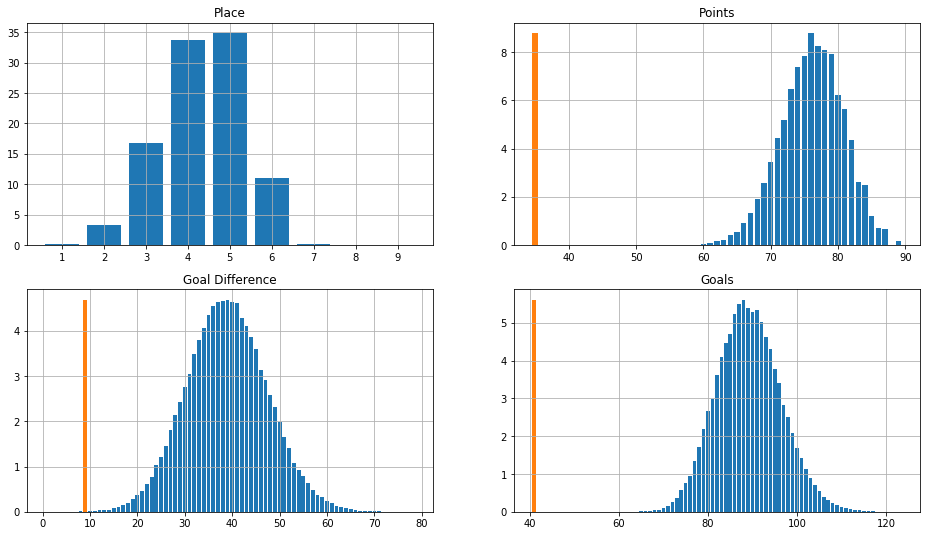

In [41]:
PremierLeague=League['EN']
PremierLeague.team_report('Man United')

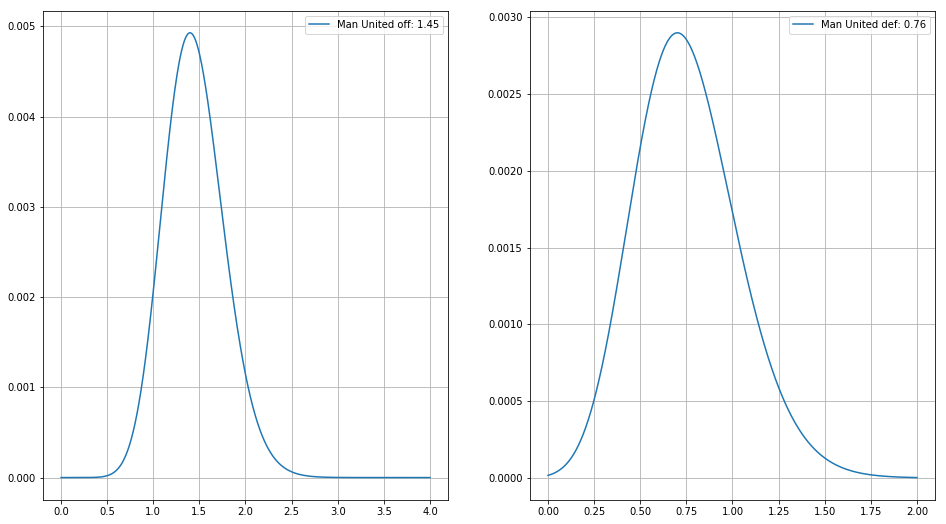

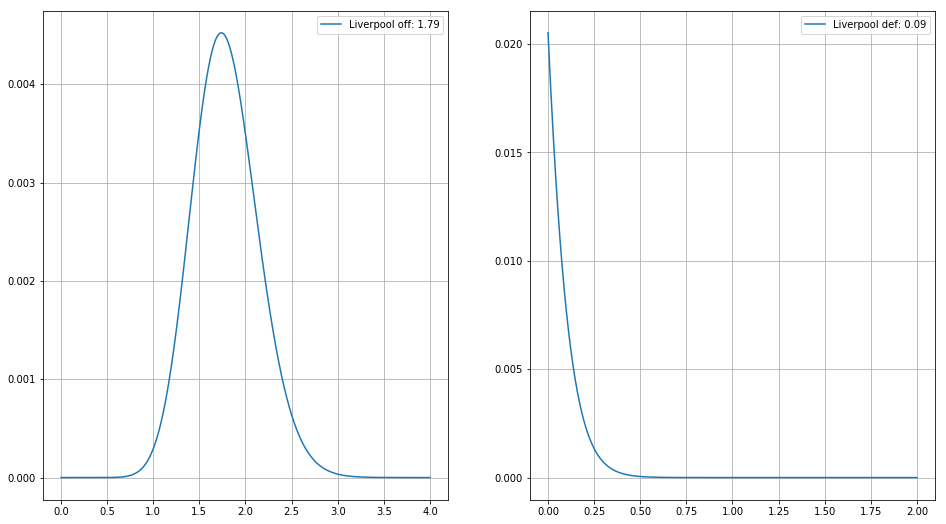

In [18]:
Teams['EN']['Man United'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)
Teams['EN']['Liverpool'].plt()
fig = plt.gcf()
fig.set_size_inches(16,9)

# Most important matches

array([3.809     , 4.00780546, 3.77761231, 3.90343314])

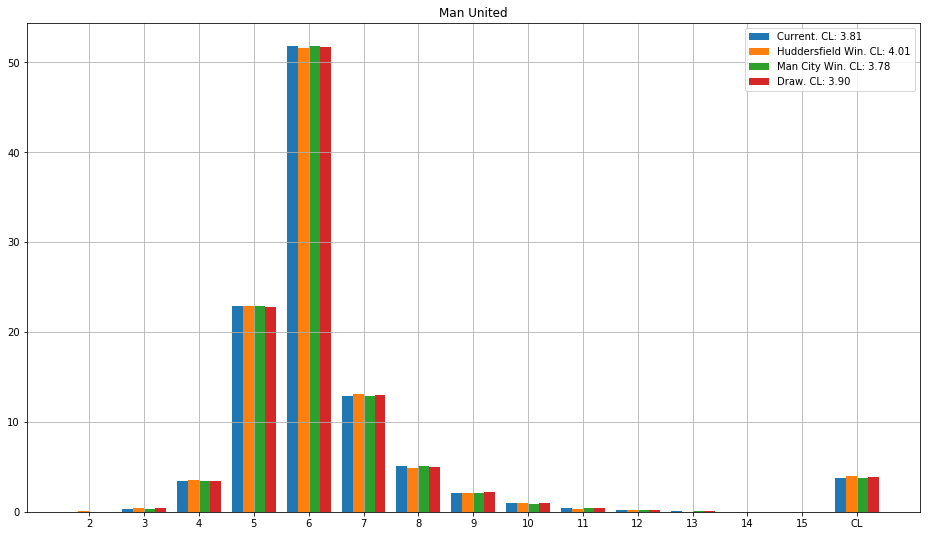

In [8]:
imp=[]
ref_team='Man United'
#ref_team='Liverpool'
#ref_team='Arsenal'
matches=[]
for x in PremierLeague.matches_to_sim:
    matches.append(x)
    pcl=PremierLeague.what_if(x,ref_team=ref_team,show_plot=False,place=2,or_better=True)
    #imp.append(pcl.max()/pcl.min())
    imp.append(pcl.std())
    #imp.append(1/pcl.min())
imp=np.array(imp)
matches=np.array(matches)
the_match=matches[imp.argmax()]
PremierLeague.what_if(the_match,ref_team=ref_team)

array([3.809     , 1.98538694, 5.2986133 , 2.59841497])

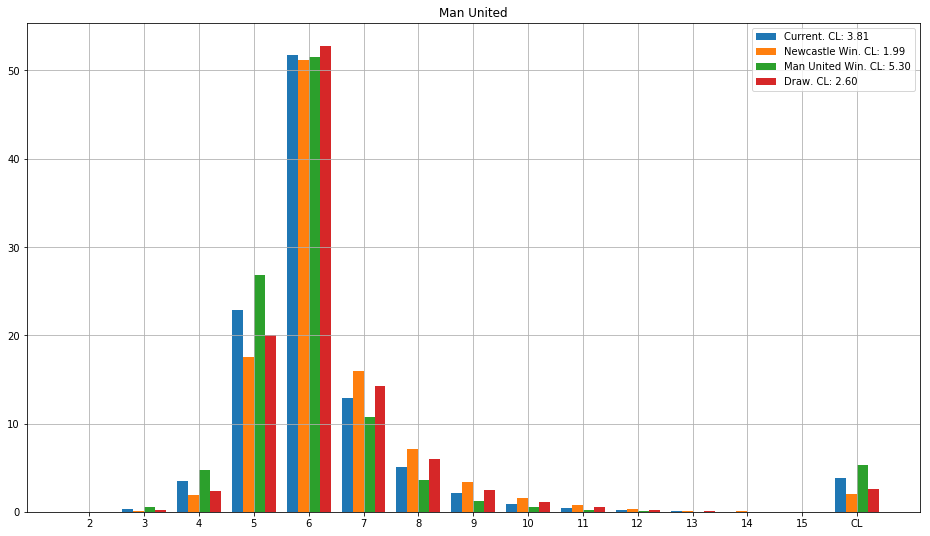

In [21]:
PremierLeague.what_if('Newcastle v Man United',ref_team='Man United')

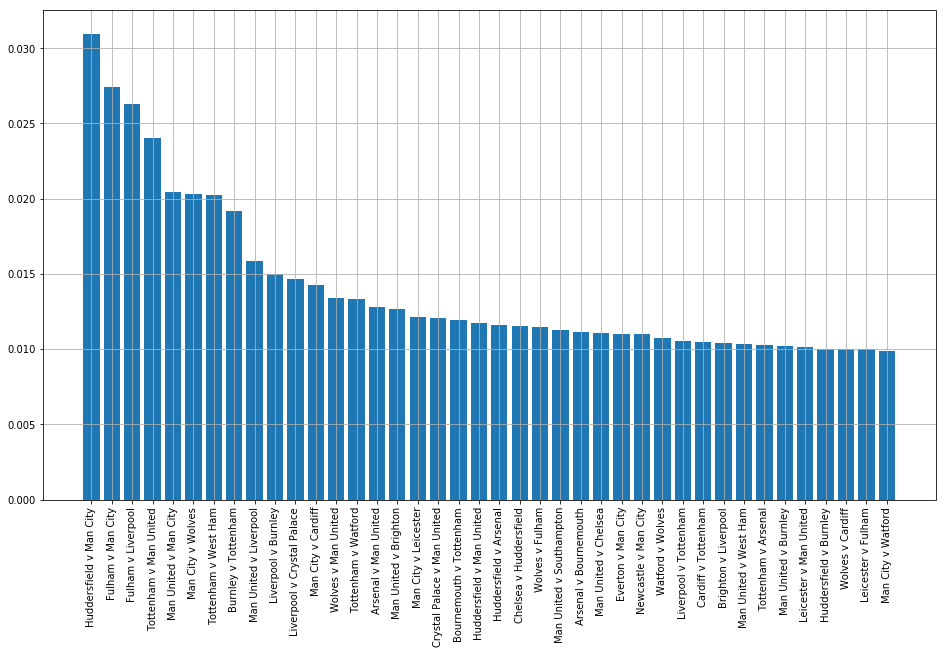

In [11]:
i_sort=(-imp).argsort()
matches=matches[i_sort]
imp=imp[i_sort]
xx=np.arange(40)
plt.bar(xx,imp[xx])
plt.xticks(xx,matches[xx],rotation=90);
plt.grid(True)
fig = plt.gcf()
fig.set_size_inches(16,9)

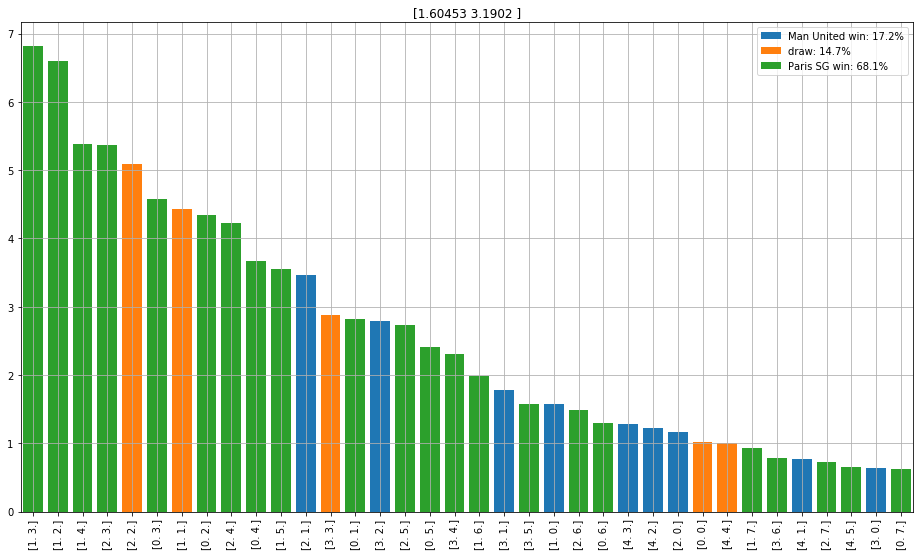

In [27]:
teams['Man United']+teams['Paris SG']
fig = plt.gcf()
fig.set_size_inches(16,9)

1.6307494444444446

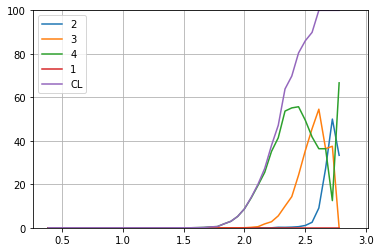

In [13]:
team_name='Man United'
#team_name='Tottenham'
#team_name='Chelsea'
#team_name='Liverpool'
i=PremierLeague.team_id[team_name]
ind=PremierLeague.place_per_team[i,:]<=4
tmp=[PremierLeague.matches_to_sim[x] for x in PremierLeague.matches_to_sim ]
n=len([x for x in tmp if x['Home']==team_name or x['Away']==team_name])
#pnts=PremierLeague.points_per_team[i,ind]-PremierLeague.current_points['Man United']
pnts=PremierLeague.points_per_team[i,:]-PremierLeague.current_points[team_name]
plc=PremierLeague.place_per_team[i,:]

nrpnts=np.arange(5,3*n+1)
p=np.zeros([nrpnts.shape[0],6])
p[:]=np.nan
for jj in range(nrpnts.shape[0]):
    ind=pnts==nrpnts[jj]
    if ind.any():
        p[jj,0]=(plc[ind]==2).sum()/ind.sum()
        p[jj,1]=(plc[ind]==3).sum()/ind.sum()
        p[jj,2]=(plc[ind]==4).sum()/ind.sum()
        p[jj,3]=(plc[ind]<=4).sum()/ind.sum()
        p[jj,4]=(plc[ind]==1).sum()/ind.sum()
    

plt.plot(nrpnts/n,100*p[:,0],label='2')
plt.plot(nrpnts/n,100*p[:,1],label='3')
plt.plot(nrpnts/n,100*p[:,2],label='4')
plt.plot(nrpnts/n,100*p[:,4],label='1')
plt.plot(nrpnts/n,100*p[:,3],label='CL')
plt.legend()
plt.grid(True)
plt.ylim([0,100])
#plt.xlabel([0,3])
pnts.mean()/n